In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Read Data**

In [3]:
url = 'https://raw.githubusercontent.com/cs575ts/Assignments/main/Assignment_2/D1.csv'

dataframe = pd.read_csv(url)

In [4]:
dataframe.head()

,Time,Ads
0,13-09-2017 00:00,80115
1,13-09-2017 01:00,79885
2,13-09-2017 02:00,89325
3,13-09-2017 03:00,101930
4,13-09-2017 04:00,121630


**Single Exponential Smoothing without inbuilt function**

In [5]:
s1 = dataframe["Ads"][0]
alpha_array = [0.3,0.6,0.9]

**Function for single exponential smoothing**

In [6]:
def dataset_with_interval(dataset):
  forecasted_list=[]
  mse_list = []
  complete_fc_val_list=[]
  for alpha in alpha_array:
    s = [s1]
    for i in range(len(dataset)):
      si = alpha*(dataset[i]) + ((1-alpha)*s[i])
      s.append(si)
    s.remove(s[0])
    
    fc_s = s.copy()
    forecasted_list.append(s[-1])
    complete_fc_val_list.append(fc_s)
    s.remove(s[-1])
    s.insert(0,0)
    cp_df = dataset.copy()
    cp_df = np.c_[ cp_df, s ] 
    error_array = cp_df[:,0] - cp_df[:,1]
    cp_df = np.c_[ cp_df, error_array ]
    sqer_arr = (cp_df[:,2])**2
    cp_df = np.c_[cp_df,sqer_arr]

    MSE = np.sum(cp_df[1:216,3])/(len(cp_df)-1) 
    mse_list.append(MSE)

  return mse_list,forecasted_list,complete_fc_val_list

**Different interval data array**

In [7]:
data= dataframe.values
dataset_array = [data[0::1][:,1],data[0::2][:,1],data[0::4][:,1],data[0::8][:,1],data[0::12][:,1],data[0::24][:,1],data[0::48][:,1]]


**Different interval time array**

In [8]:
time_array = []
for d in dataset_array:
  t = range(d.shape[0])
  time_array.append(t)

**Function call for MSE and prediction calculations**

In [9]:
final_mse_list = []
final_forecasted_list = []
final_fc_val_list = []
for df in dataset_array:
  mse_list,forecasted_list,complete_fc_val_list = dataset_with_interval(df)
  final_mse_list.append(mse_list)
  final_fc_val_list.append(complete_fc_val_list)
  final_forecasted_list.append(forecasted_list)

In [10]:
final_mse_list

[[455220005.32839435, 247187295.55919522, 159036671.35309115],
 [732369361.3150665, 565409084.6478641, 456865538.96451145],
 [900751064.3750383, 998059059.5499265, 1119107048.587025],
 [1313086210.9422383, 1693687586.197173, 2254983641.5993266],
 [1972523959.9634824, 2719803160.289608, 4217626030.8131948],
 [37262312.565893136, 38481830.55221583, 40952926.60180214],
 [60305075.36812503, 72359971.5, 84361693.39312503]]

In [11]:
final_forecasted_list

[[108015.25451990249, 89610.27741921894, 81874.80834374316],
 [123210.4957894356, 111035.50176996569, 98297.22893551653],
 [127785.57000954518, 131247.96132724924, 126166.67446727124],
 [116232.69075382387, 129669.45054343354, 146574.61647787888],
 [116190.80242264064, 124477.98461702996, 139630.1478211688],
 [77728.42117290001, 74195.9858304, 71285.1566109],
 [77731.095, 74532.6, 71229.885]]

In [12]:
min_idx=[]
for minval in final_mse_list: 
  minidx = minval.index(min(minval))
  min_idx.append(minidx)

In [13]:
interval_arr = [1,2,4,8,12,24,48]

**Plotting function for predicted values ad actual values**

In [14]:
def plotting_function(fc_val,data_val,time_val,interval_val):
  fig = plt.gcf()
  #plt.plot(dataframe['Time'],dataframe['Ads'],color='g',label='Original')
  plt.plot(time_val,data_val,color='g',label='Original')
  plt.plot(time_val,fc_val,color='r',label='Forcasted')
  fig.set_size_inches(12,8)
  plt.legend()
  plt.xlabel('Time')
  plt.ylabel('Ads')
  plt.title('Prediction at '+str(interval_val)+' hour interval at the least MSE')
  plt.figure()
  plt.close

**Plotting of predicted values and actual values for different intervals**

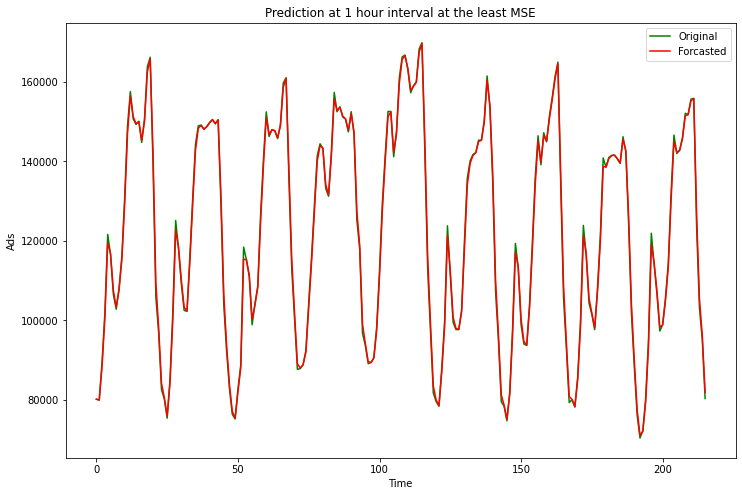

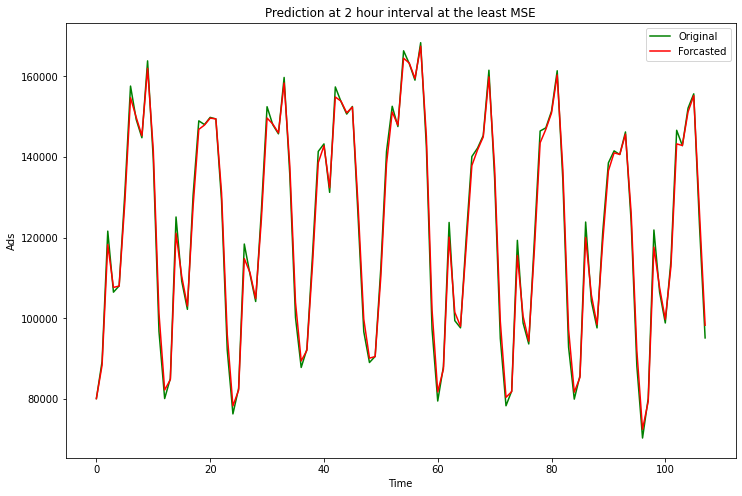

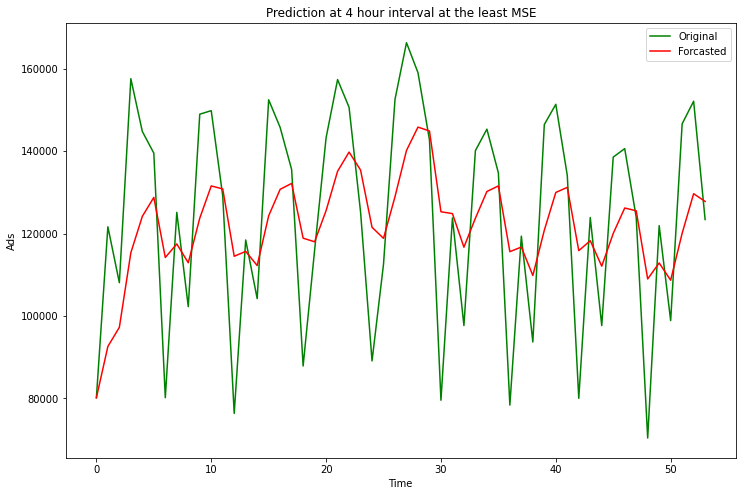

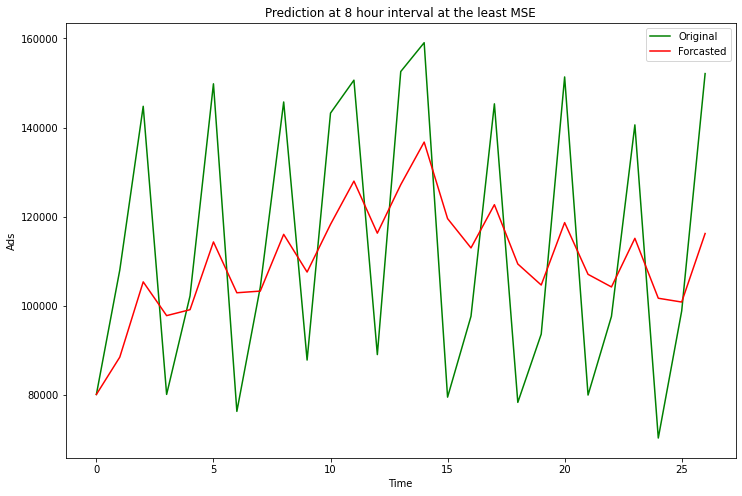

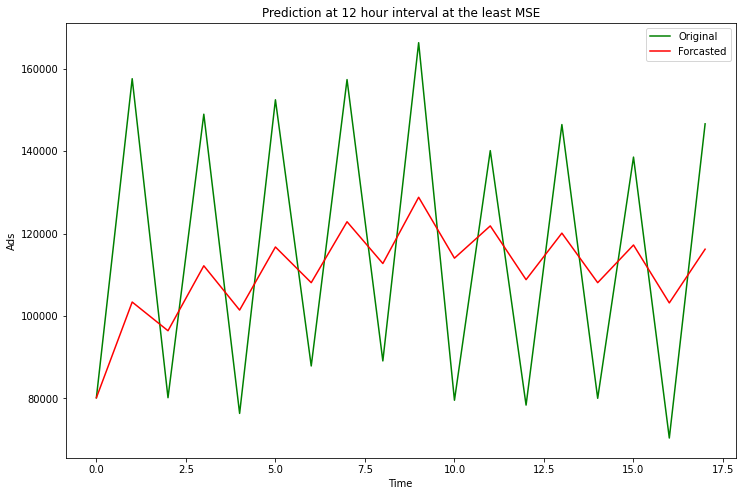

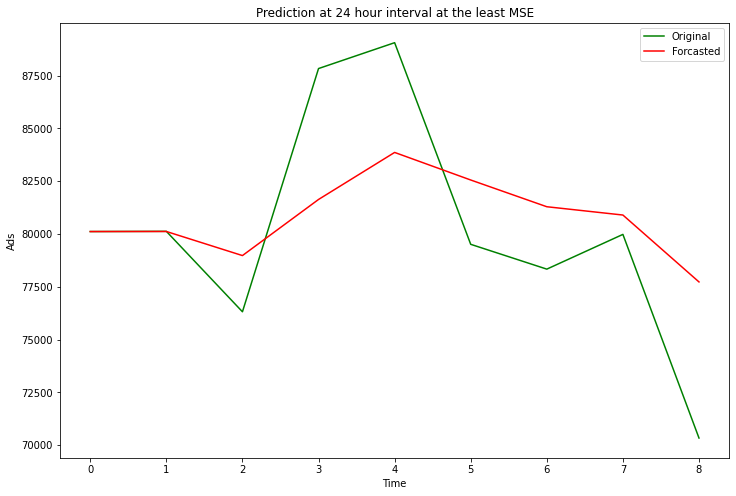

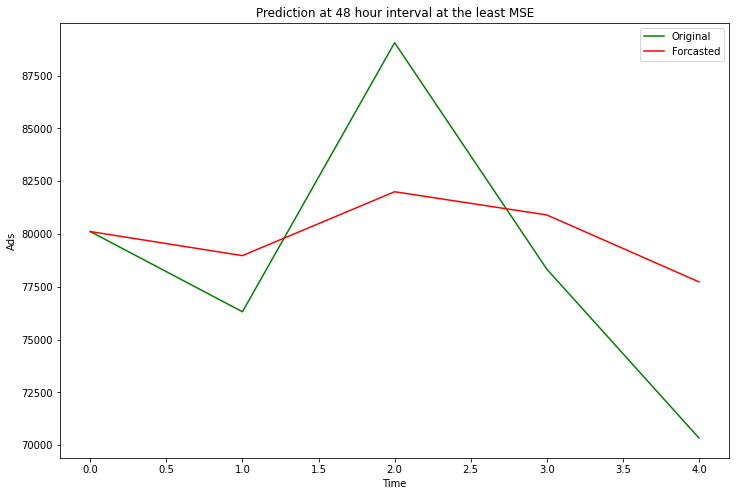

<Figure size 432x288 with 0 Axes>

In [15]:
for fc_idx in range(7):
  plotting_function(final_fc_val_list[fc_idx][min_idx[fc_idx]],dataset_array[fc_idx],time_array[fc_idx],interval_arr[fc_idx])  

**Table of Least MSE value for each interval**

In [16]:
from tabulate import tabulate

tab_array = []
for n in range(7):
  tab = [(interval_arr[n]),final_mse_list[n][min_idx[n]]]
  tab_array.append(tab)

table = tabulate(tab_array, headers=['interval(in hours)', 'Least MSE'], tablefmt='orgtbl')

print(table)

|   interval(in hours) |   Least MSE |
|----------------------+-------------|
|                    1 | 1.59037e+08 |
|                    2 | 4.56866e+08 |
|                    4 | 9.00751e+08 |
|                    8 | 1.31309e+09 |
|                   12 | 1.97252e+09 |
|                   24 | 3.72623e+07 |
|                   48 | 6.03051e+07 |


**Plotting of MSE at different intervals**

In [17]:
def mse_plotting_func(inter_val,mseval):
  fig = plt.gcf()
  ax = fig.add_axes([0,0,1,1])
  rects = ax.bar(inter_val,round(mseval,2),color='b')
  for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
  fig.set_size_inches(12,8)
  plt.xlabel('Interval(in hours)')
  plt.ylabel('MSE')
  plt.title('MSE VS Interval')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


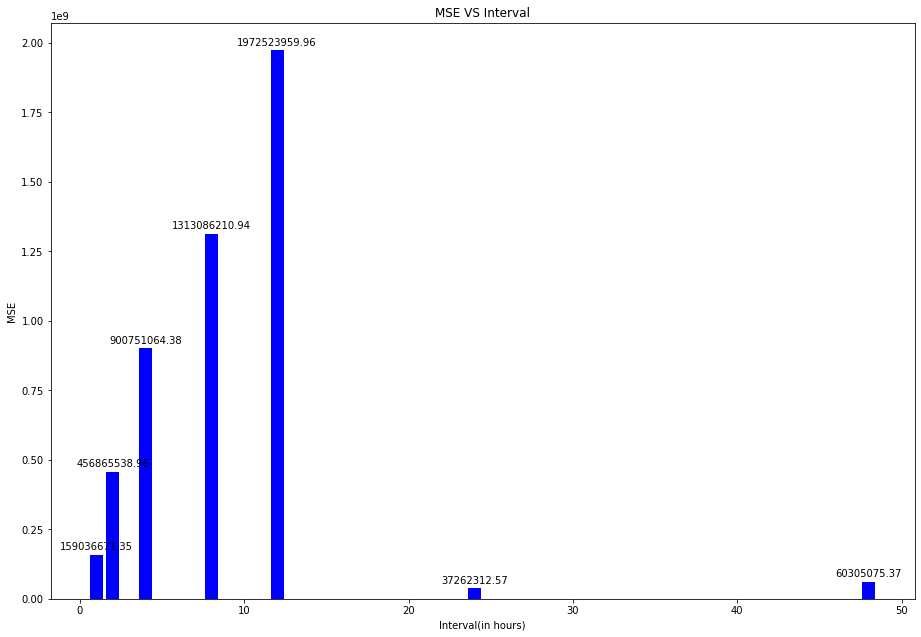

In [18]:
for idx in range(7):
  mse_plotting_func(interval_arr[idx],final_mse_list[idx][min_idx[idx]])

**Comparing forecasted values with inbuilt function (on original data)**

In [20]:
from sklearn.metrics import mean_squared_error

model = SimpleExpSmoothing(dataframe['Ads'])
dataframe['pred_val'] = model.fit(smoothing_level=0.9,optimized=False).fittedvalues.shift(0)

MSE = mean_squared_error(dataframe.pred_val.dropna(),dataframe.Ads)

In [21]:
print('MSE (inbuilt function): ',MSE)
print('MSE (own function): ',final_mse_list[0][min_idx[0]])

MSE (inbuilt function):  158300390.4671972
MSE (own function):  159036671.35309115


In [22]:
print('Difference in error: ',final_mse_list[0][min_idx[0]]-MSE)

Difference in error:  736280.8858939409
